In [1]:
import pandas as pd
import numpy as np
import punppci as pn
from punppci.example import fetch_example_data

Using TensorFlow backend.


In [2]:
# Get example data frame
df_full = fetch_example_data()

# Mask the bottom half of the triangle
df = pn.data_as_at(df_full, df_full.origin_date.agg("max"), "claim")
df.head()

,origin_date,carrier,flight,departing,destination,distance,ultimate_claim_count,ultimate_claim_size,expected_delay,claim_count_0,...,claim_paid_3,claim_paid_4,claim_paid_5,claim_paid_6,claim_paid_7,claim_paid_8,claim_paid_9,claim_paid_10,claim_count_11,claim_paid_11
101131,2013-12-31,DL,457,JFK,SLC,1990,1,50000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95035,2013-12-31,B6,1843,EWR,PBI,1023,0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178230,2013-04-30,UA,1548,EWR,BOS,200,1,25000.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
313567,2013-09-30,DL,801,JFK,PHX,2153,0,0.0,2.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22550,2013-01-31,DL,1919,LGA,MSP,1020,0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Make Dataset
ds = pn.Dataset(
    features=df[["carrier", "flight", "departing", "destination", "distance"]],
    origin=df.origin_date,
    exposure=None,   # Exposure weight is optional
    claim_count=df[["claim_count_{}".format(x) for x in range(0, 11)]],
    claim_paid=df[["claim_paid_{}".format(x) for x in range(0, 11)]]
)

df.groupby(["origin_date"]).agg('sum')

,flight,distance,ultimate_claim_count,ultimate_claim_size,expected_delay,claim_count_0,claim_count_1,claim_count_2,claim_count_3,claim_count_4,...,claim_paid_3,claim_paid_4,claim_paid_5,claim_paid_6,claim_paid_7,claim_paid_8,claim_paid_9,claim_paid_10,claim_count_11,claim_paid_11
origin_date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,1573925,801025,330,57345000.0,4272.0,24.0,61.0,50.0,29.0,18.0,...,1940000.0,1290000.0,860000.0,850000.0,970000.0,1115000.0,720000.0,1240000.0,86.0,38645000.0
2013-02-28,1414451,742274,315,62025000.0,4529.0,25.0,49.0,54.0,28.0,15.0,...,1760000.0,845000.0,1050000.0,320000.0,610000.0,1270000.0,1035000.0,400000.0,99.0,45895000.0
2013-03-31,1626146,821513,290,59670000.0,4836.0,21.0,41.0,36.0,21.0,13.0,...,870000.0,1125000.0,855000.0,325000.0,1230000.0,1285000.0,395000.0,1790000.0,0.0,0.0
2013-04-30,1613846,902880,396,85205000.0,5885.0,29.0,60.0,58.0,29.0,19.0,...,2450000.0,1250000.0,1430000.0,1520000.0,705000.0,1325000.0,2075000.0,0.0,0.0,0.0
2013-05-31,1768441,897079,309,71010000.0,5774.0,12.0,45.0,35.0,16.0,14.0,...,1710000.0,810000.0,665000.0,545000.0,835000.0,540000.0,0.0,0.0,0.0,0.0
2013-06-30,1633467,877894,350,89080000.0,6198.0,31.0,46.0,31.0,23.0,12.0,...,1585000.0,675000.0,1750000.0,985000.0,1350000.0,0.0,0.0,0.0,0.0,0.0
2013-07-31,1579433,899903,369,102020000.0,6850.0,28.0,50.0,44.0,14.0,12.0,...,1245000.0,880000.0,1720000.0,850000.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-08-31,1699899,907791,361,63770000.0,4773.0,23.0,72.0,48.0,31.0,19.0,...,2395000.0,1425000.0,935000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-30,1584796,810886,217,34280000.0,3343.0,21.0,43.0,26.0,18.0,8.0,...,970000.0,370000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(<Figure size 864x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1277a32e8>)

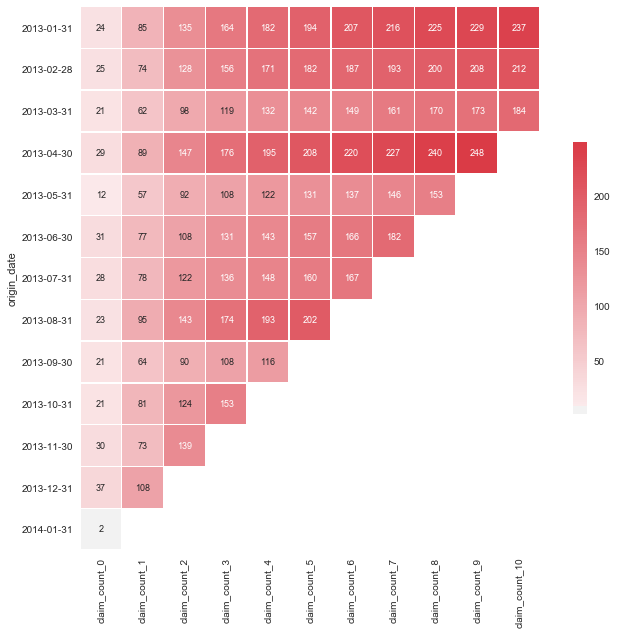

In [4]:
# Cumulative Count Triangle and Heat Map
ds.plot_triangle_claim_count()

(<Figure size 864x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127791080>)

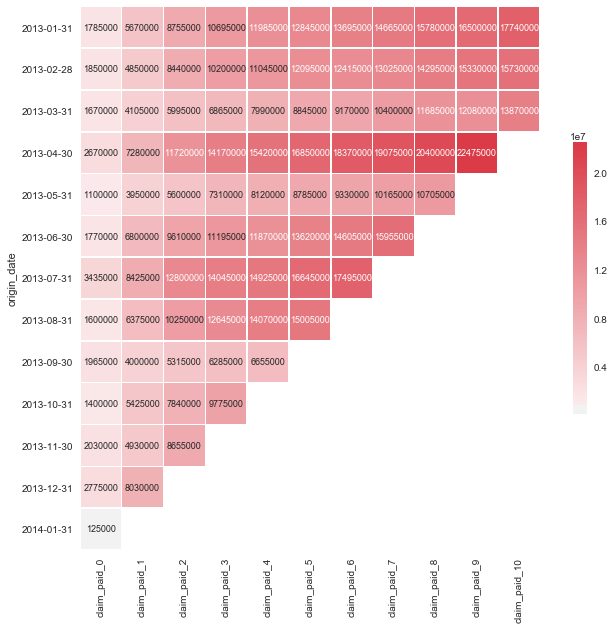

In [5]:
# Cumulative paid triangle and heatmap
ds.plot_triangle_claim_paid()

(<Figure size 864x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127758940>)

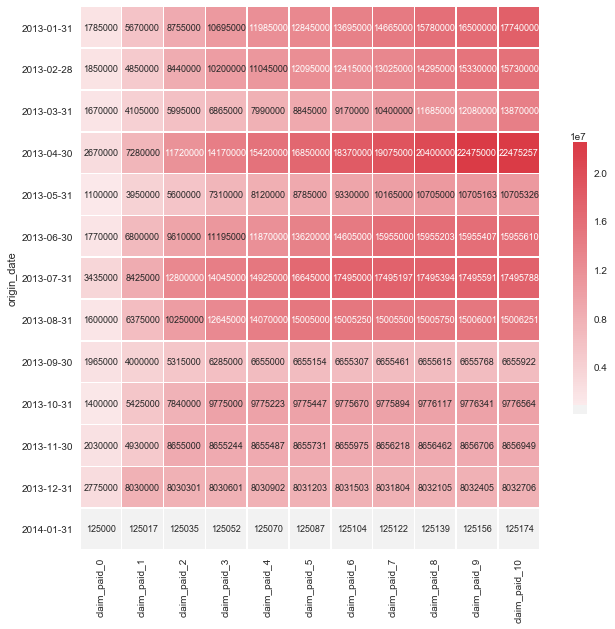

In [6]:
# Standard PPCI Projection
ds.plot_triangle_ppci()

In [7]:
# Model - Make, Fit and Predict
model = pn.PNPPCILossEstimator(dataset=ds)

In [8]:
# Fit with optional weights
model.fit(ds.X(), ds.y(), w=ds.w())

Epoch 1/1
10000/10000 [==============================] - 12s 1ms/step - loss: 5.8681 - claim_count_0_loss: 0.1380 - claim_count_1_loss: 0.2416 - claim_count_2_loss: 0.2139 - claim_count_3_loss: 0.1332 - claim_count_4_loss: 0.0915 - claim_count_5_loss: 0.0756 - claim_count_6_loss: 0.0614 - claim_count_7_loss: 0.0681 - claim_count_8_loss: 0.0659 - claim_count_9_loss: 0.0485 - claim_count_10_loss: 0.0603 - claim_paid_0_loss: 382918278.7610 - claim_paid_1_loss: 671914098.2564 - claim_paid_2_loss: 495695558.7003 - claim_paid_3_loss: 280585058.1129 - claim_paid_4_loss: 136070721.4757 - claim_paid_5_loss: 238474481.9686 - claim_paid_6_loss: 175979553.9038 - claim_paid_7_loss: 152962374.9600 - claim_paid_8_loss: 249934261.4319 - claim_paid_9_loss: 317838759.1788 - claim_paid_10_loss: 282179162.4412


PNPPCILossEstimator(category_levels=[16, 3, 98],
          category_names=['carrier', 'departing', 'destination'],
          claim_count_names=['claim_count_0', 'claim_count_1', 'claim_count_2', 'claim_count_3', 'claim_count_4', 'claim_count_5', 'claim_count_6', 'claim_count_7', 'claim_count_8', 'claim_count_9', 'claim_count_10'],
          claim_count_scale=3.855818901077205,
          claim_paid_names=['claim_paid_0', 'claim_paid_1', 'claim_paid_2', 'claim_paid_3', 'claim_paid_4', 'claim_paid_5', 'claim_paid_6', 'claim_paid_7', 'claim_paid_8', 'claim_paid_9', 'claim_paid_10'],
          claim_paid_scale=2.9820872141722243e-10, clipnorm=10000,
          dense_layers_development=3, dense_layers_pricing=3,
          dense_size_development=64, dense_size_pricing=64, epochs=None,
          feature_names=['origin', 'carrier', 'departing', 'destination', 'flight', 'distance'],
          l1_l2_lin_development=0.01, l1_l2_lin_pricing=0.01,
          l1_l2_res_development=0.01, l1_l2_res_prici

In [9]:
# Explained vs Unexplained factors
model.linear_vs_residual()

,Linear,Residual Network
risk_pricing_ultimate_claim_count,0.508221,0.491779
risk_pricing_ultimate_claim_size,0.499526,0.500474
claim_count_0,0.970793,0.029207
claim_count_1,0.712479,0.287521
claim_count_2,0.612120,0.387880
claim_count_3,0.367328,0.632671
claim_count_4,0.645178,0.354822
claim_count_5,0.683783,0.316217
claim_count_6,0.308911,0.691089
claim_count_7,0.739841,0.260159


In [10]:
# Predict values
model.predict(ds.X()).head(5)

,claim_count_0,claim_count_1,claim_count_2,claim_count_3,claim_count_4,claim_count_5,claim_count_6,claim_count_7,claim_count_8,claim_count_9,...,claim_paid_1,claim_paid_2,claim_paid_3,claim_paid_4,claim_paid_5,claim_paid_6,claim_paid_7,claim_paid_8,claim_paid_9,claim_paid_10
0,0.021401,0.061829,0.037061,0.024807,0.014524,0.011093,0.007883,0.009308,0.009399,0.005973,...,1032.190552,21.992895,3.327009,1.822452,1.928269,1.523782,1.325777,1.903475,1.756748,1.600438
1,0.023315,0.067267,0.041241,0.026685,0.016107,0.012200,0.008736,0.010378,0.010370,0.006592,...,1130.338989,24.219200,3.642887,1.993158,2.110590,1.672638,1.449839,2.089667,1.929488,1.757687
2,0.021007,0.061876,0.038177,0.024513,0.014777,0.011249,0.008004,0.009649,0.009519,0.006056,...,1036.363281,22.256449,3.339230,1.824676,1.935556,1.539073,1.333456,1.920419,1.772567,1.617972
3,0.021358,0.061724,0.037137,0.024804,0.014504,0.011083,0.007871,0.009286,0.009402,0.005967,...,1031.885132,22.005577,3.326807,1.822786,1.928136,1.522388,1.324478,1.902342,1.756413,1.598636
4,0.022589,0.065667,0.040087,0.026131,0.015640,0.011894,0.008482,0.010131,0.010099,0.006419,...,1101.156128,23.612179,3.549350,1.942446,2.056782,1.629572,1.412891,2.036666,1.879087,1.713200


(<Figure size 864x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12451bdd8>)

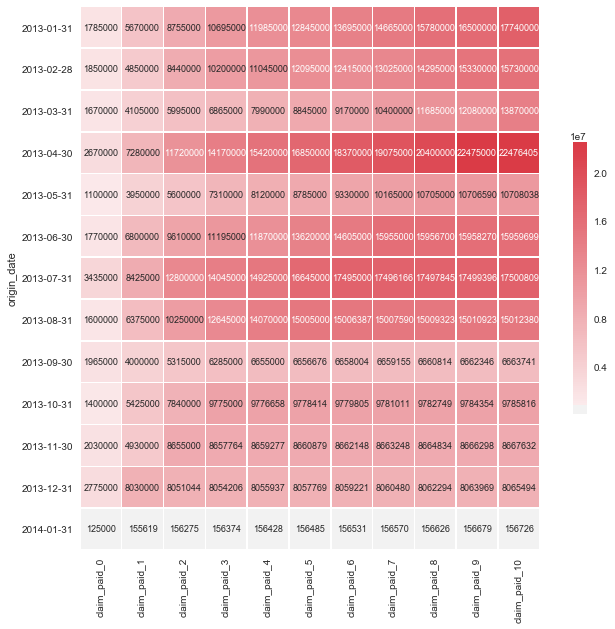

In [11]:
ds.plot_triangle_model(model)

In [12]:
ds_true = pn.Dataset(
    features=df_full[["carrier", "flight", "departing", "destination", "distance"]],
    origin=df_full.origin_date,
    exposure=None,   # Exposure weight is optional
    claim_count=df_full[["claim_count_{}".format(x) for x in range(0, 11)]],
    claim_paid=df_full[["claim_paid_{}".format(x) for x in range(0, 11)]]
)

pn.benchmark(ds, model, ds_true)

,claim_paid_0,claim_paid_1,claim_paid_2,claim_paid_3,claim_paid_4,claim_paid_5,claim_paid_6,claim_paid_7,claim_paid_8,claim_paid_9,claim_paid_10
PPCI,0.0,2.079861e+10,7.578254e+11,3.825112e+12,7.453906e+12,1.190644e+13,1.661624e+13,1.939889e+13,2.625668e+13,3.497560e+13,4.662260e+13
Model,0.0,1.842258e+10,7.453017e+11,3.796254e+12,7.412205e+12,1.185089e+13,1.654676e+13,1.932064e+13,2.615977e+13,3.485763e+13,4.647683e+13


In [13]:
# Model - Make, Fit and Predict
opt = pn.PNPPCILossOptimizer(dataset=ds)

In [14]:
# Fit with optional weights
opt.fit(ds.X(), ds.y(), w=ds.w())

3333/3333 [==============================] - 1s 348us/step
best score: -inf, best params {'clipnorm': 1.8855387955490066, 'dense_layers_development': 2, 'dense_layers_pricing': 4, 'dense_size_development': 128, 'dense_size_pricing': 16, 'epochs': 4, 'l1_l2_lin_development': 0.010518124705331231, 'l1_l2_lin_pricing': 0.9680257731016072, 'l1_l2_res_development': 0.3162984483555587, 'l1_l2_res_pricing': 796966.6036603703}
3333/3333 [==============================] - 1s 401us/step
best score: -inf, best params {'clipnorm': 1.8855387955490066, 'dense_layers_development': 2, 'dense_layers_pricing': 4, 'dense_size_development': 128, 'dense_size_pricing': 16, 'epochs': 4, 'l1_l2_lin_development': 0.010518124705331231, 'l1_l2_lin_pricing': 0.9680257731016072, 'l1_l2_res_development': 0.3162984483555587, 'l1_l2_res_pricing': 796966.6036603703}
3333/3333 [==============================] - 1s 369us/step
best score: -inf, best params {'clipnorm': 1.8855387955490066, 'dense_layers_development': 2, '

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Predict frequency
opt.predict(ds.X(), response_variable="frequency")[0:5]

In [ ]:
# Predict size
opt.predict(ds.X(), response_variable="size")[0:5]

In [ ]:
# Partial Dependence - Frequency
opt.plot_pdp_frequency(ds, 'distance')

In [ ]:
# Partial Dependence - Size
opt.plot_pdp_size(ds, 'carrier')

In [ ]:
# Explained vs Unexplained factors
opt.linear_vs_residual()

In [ ]:
pn.benchmark(ds, opt, ds_true)

In [ ]:
from pdpbox import pdp, get_dataset

test_otto = get_dataset.otto()
otto_data = test_otto['data']
otto_features = test_otto['features']
otto_model = test_otto['rf_model']
otto_target = test_otto['target']

pdp_feat_67_rf = pdp.pdp_isolate(model=otto_model,
                                 dataset=otto_data,
                                 model_features=otto_features,
                                 feature='feat_67')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_feat_67_rf,
                         feature_name='feat_67',
                         center=True,
                         x_quantile=True,
                         ncols=3,
                         plot_lines=True,
                         frac_to_plot=100)

In [ ]:
# Explanations and Diagnostics
model.plot_graph()

In [ ]:
tri_incr

In [ ]:
tri = ds.claim_count.copy()
tri["origin_date"] = ds.origin
tri

In [ ]:
import seaborn as sns

pred = opt.predict(ds.X())
pred[ds.origin.name] = ds.origin.values
pred_sum = pred.groupby([ds.origin.name]).agg("sum")

In [ ]:
# Count predictions
count_df = ds.claim_count.copy()
count_df[ds.origin.name] = ds.origin.values

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(count_df.groupby([ds.origin.name]).agg("sum"), 
        center=0,
        square=True,
        linewidths=0.5,
        annot=True,
        cbar_kws={"shrink": 0.5})

In [ ]:
# Paid predictions
paid_df = ds.claim_paid.copy()
paid_df[ds.origin.name] = ds.origin.values

sns.heatmap(paid_df.groupby([ds.origin.name]).agg("sum"), 
        center=0,
        square=True,
        linewidths=0.5,
        annot=True,
        cbar_kws={"shrink": 0.5})